# Gráficos

## Bibliotecas

In [272]:
#!pip install matplotlib
#!pip install aiohttp
#!pip install geopandas
#!pip install plotly

In [273]:
#import matplotlib.pyplot as plt
#plt.rcParams['font.family'] = 'DeJavu Serif'
#plt.rcParams['font.serif'] = ['Times New Roman']

In [274]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import geopandas as gpd
import fsspec

## Informar

## Gráficos de colunas

In [275]:
def generate_bar_plot(data_labels, data_values=None, xlabel='Categories', ylabel='Values', title='Bar Plot', grid=False, color='blue'):
    """
    Gera um gráfico de barras (bar plot) a partir dos dados fornecidos.

    Parâmetros:
    - data_labels (list ou DataFrame): 
        Uma lista de rótulos para as categorias ou uma coluna do DataFrame
        contendo os rótulos das categorias.
    - data_values (list, opcional): 
        Uma lista com os valores correspondentes a cada categoria.
        Se não for fornecida, deve ser fornecido um pandas DataFrame,
        e os rótulos e valores serão extraídos do DataFrame.
    - xlabel (str, opcional): 
        Rótulo do eixo x (categorias).
    - ylabel (str, opcional): 
        Rótulo do eixo y (valores).
    - title (str, opcional): 
        Título do gráfico.
    - grid (bool, opcional): 
        Se True, exibe o grid no gráfico.
    - bar_color (str, opcional):
        Cor das barras do gráfico. Pode ser uma string com o nome da cor
        em inglês ou um código hexadecimal (por exemplo, '#FF5733').
    """
    if data_values is None:
        if not isinstance(data_labels, pd.DataFrame):
            raise ValueError("If data_values is not provided, data_labels must be a pandas DataFrame.")
        data_values = data_labels.iloc[:, 1]
        data_labels = data_labels.iloc[:, 0]
    elif not isinstance(data_labels, list) or not isinstance(data_values, list):
        raise ValueError("Both data_labels and data_values must be either lists or a pandas DataFrame.")

    # Show grid if enabled
    if grid:
        plt.grid()   

    if not mcolors.is_color_like(color):
        raise ValueError("Invalid color value. Please provide a valid color name recognized by Matplotlib.")
    
    plt.bar(data_labels, data_values, color=color, zorder=2)
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

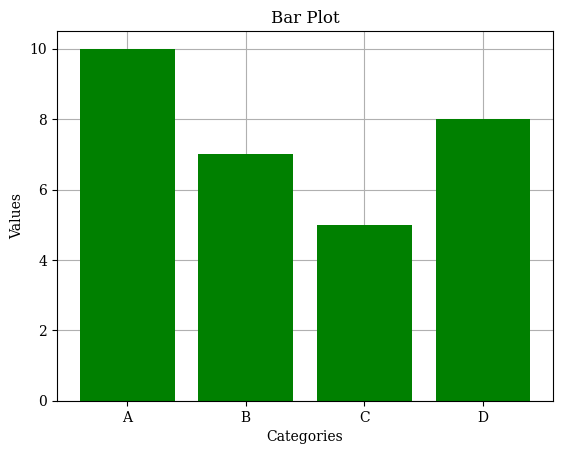

In [276]:
# Using lists
x = ['A', 'B', 'C', 'D']
y = [10, 7, 5, 8]
generate_bar_plot(
    x, y, 
    xlabel='Categories', 
    ylabel='Values', 
    title='Bar Plot', 
    grid=True, 
    color='green'
)

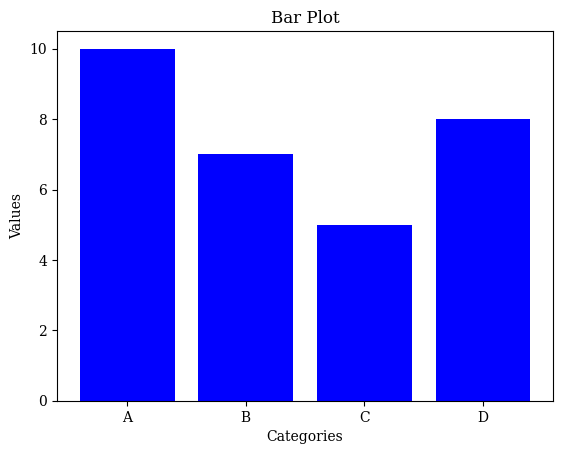

In [277]:
# Using pandas DataFrame
data = pd.DataFrame({
    'Categories': ['A', 'B', 'C', 'D'], 
    'Values': [10, 7, 5, 8]
})
generate_bar_plot(
    data, 
    xlabel='Categories', 
    ylabel='Values', 
    title='Bar Plot'
)

### Gráfico de colunas empilhadas

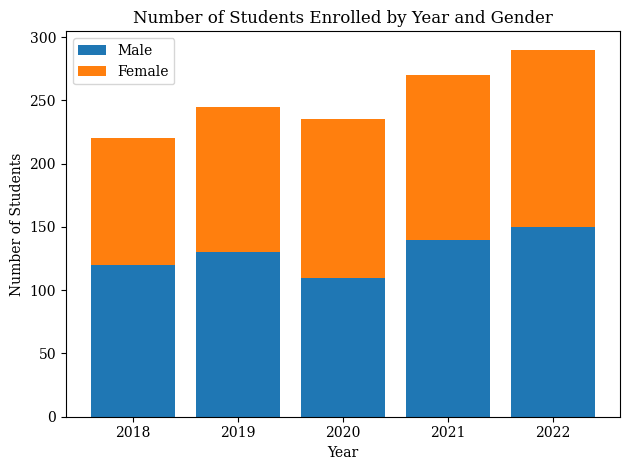

In [278]:
# Sample data for students enrolled per year and gender
years = [2018, 2019, 2020, 2021, 2022]
male_students = [120, 130, 110, 140, 150]
female_students = [100, 115, 125, 130, 140]

# Stacked bar chart
fig, ax = plt.subplots()

# Plotting the bars for male students
ax.bar(years, male_students, label='Male')

# Plotting the bars for female students on top of male students
ax.bar(years, female_students, bottom=male_students, label='Female')

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Students')
ax.set_title('Number of Students Enrolled by Year and Gender')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Gráfico de barras empilhadas

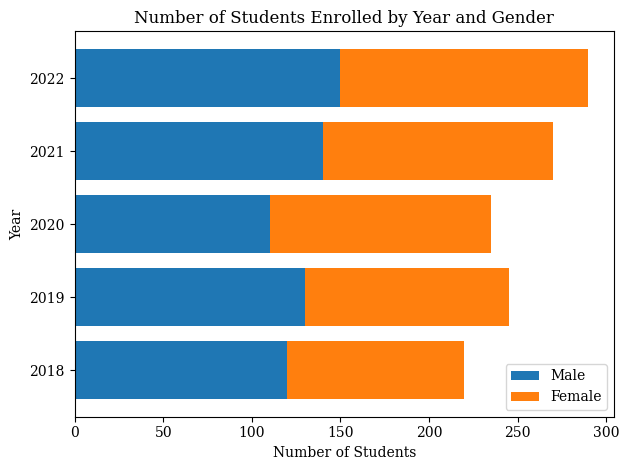

In [279]:
# Sample data for students enrolled per year and gender
years = [2018, 2019, 2020, 2021, 2022]
male_students = [120, 130, 110, 140, 150]
female_students = [100, 115, 125, 130, 140]

# Stacked horizontal bar chart
fig, ax = plt.subplots()

# Plotting the horizontal bars for male students
ax.barh(years, male_students, label='Male')

# Plotting the horizontal bars for female students on the right side of male students
ax.barh(years, female_students, left=male_students, label='Female')

# Customize the plot
ax.set_ylabel('Year')
ax.set_xlabel('Number of Students')
ax.set_title('Number of Students Enrolled by Year and Gender')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Gráficos de barras

In [280]:
def generate_horizontal_bar_plot(data_labels, data_values=None, xlabel='Values', ylabel='Categories', title='Horizontal Bar Plot', grid=False, color='blue'):
    """
    Gera um gráfico de barras horizontais (horizontal bar plot) a partir dos dados fornecidos.

    Parâmetros:
    - data_labels (list ou DataFrame): 
        Uma lista de rótulos para as categorias ou uma coluna do DataFrame
        contendo os rótulos das categorias.
    - data_values (list, opcional): 
        Uma lista com os valores correspondentes a cada categoria.
        Se não for fornecida, deve ser fornecido um pandas DataFrame,
        e os rótulos e valores serão extraídos do DataFrame.
    - xlabel (str, opcional): 
        Rótulo do eixo x (valores).
    - ylabel (str, opcional): 
        Rótulo do eixo y (categorias).
    - title (str, opcional): 
        Título do gráfico.
    - grid (bool, opcional):
        Se True, habilita a exibição da grade no gráfico.
    - color (str, opcional):
        Define a cor das barras do gráfico (por exemplo, 'blue', 'red', 'green', etc.).
    """
    if data_values is None:
        if not isinstance(data_labels, pd.DataFrame):
            raise ValueError("If data_values is not provided, data_labels must be a pandas DataFrame.")
        data_values = data_labels.iloc[:, 1]
        data_labels = data_labels.iloc[:, 0]
    elif not isinstance(data_labels, list) or not isinstance(data_values, list):
        raise ValueError("Both data_labels and data_values must be either lists or a pandas DataFrame.")

    if not mcolors.is_color_like(color):
        raise ValueError("Invalid color value. Please provide a valid color name recognized by Matplotlib.")

    plt.barh(data_labels, data_values, color=color, zorder=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    if grid:
        plt.grid(True)

    plt.show()


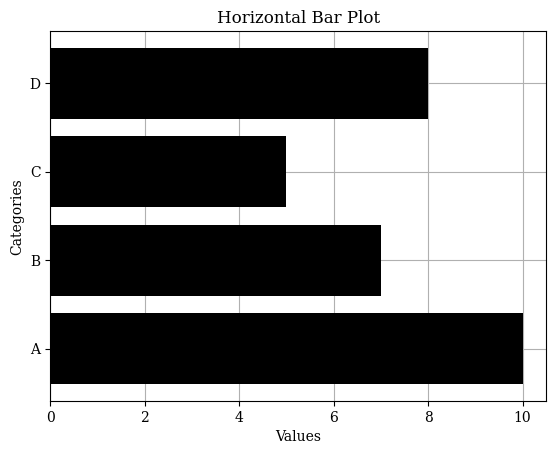

In [281]:
# Using lists
x = ['A', 'B', 'C', 'D']
y = [10, 7, 5, 8]
generate_horizontal_bar_plot(
    x, y, 
    xlabel='Values', 
    ylabel='Categories', 
    title='Horizontal Bar Plot', 
    grid=True, 
    color='black'
)

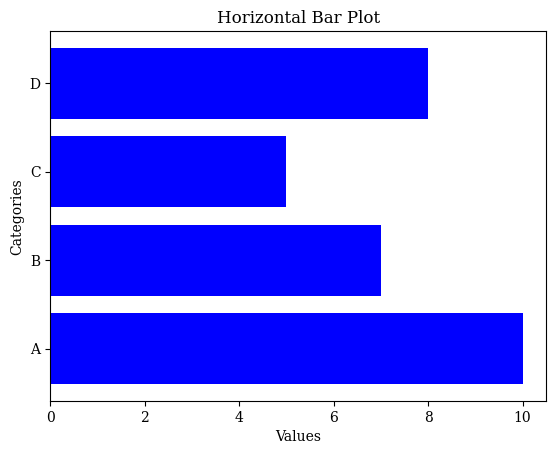

In [282]:
# Using pandas DataFrame
data = pd.DataFrame({
    'Categories': ['A', 'B', 'C', 'D'], 
    'Values': [10, 7, 5, 8]
})
generate_horizontal_bar_plot(
    data, 
    xlabel='Values', 
    ylabel='Categories', 
    title='Horizontal Bar Plot'
)

## Gráfico de Linha:

In [283]:
def generate_line_plot(data_x, data_y, xlabel='X', ylabel='Y', title='Line Plot', grid=False, color='blue'):
    """
    Gera um gráfico de linha (line plot) a partir dos dados fornecidos.

    Parâmetros:
    - data_x (list): 
        Uma lista contendo os valores do eixo x.
    - data_y (list): 
        Uma lista contendo os valores do eixo y, correspondentes aos valores de x.
    - xlabel (str, opcional): 
        Rótulo do eixo x.
    - ylabel (str, opcional): 
        Rótulo do eixo y.
    - title (str, opcional): 
        Título do gráfico.
    - grid (bool, opcional):
        Se True, habilita a exibição da grade no gráfico.
    - color (str, opcional):
        Cor da linha do gráfico (por padrão é azul).
    """
    if not isinstance(data_x, list) or not isinstance(data_y, list):
        raise ValueError("Both data_x and data_y must be lists.")

    if not mcolors.is_color_like(color):
        raise ValueError("Invalid color. Please provide a valid color name or HTML color representation.")

    plt.plot(data_x, data_y, zorder=2, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    if grid:
        plt.grid(True)
    
    plt.show()

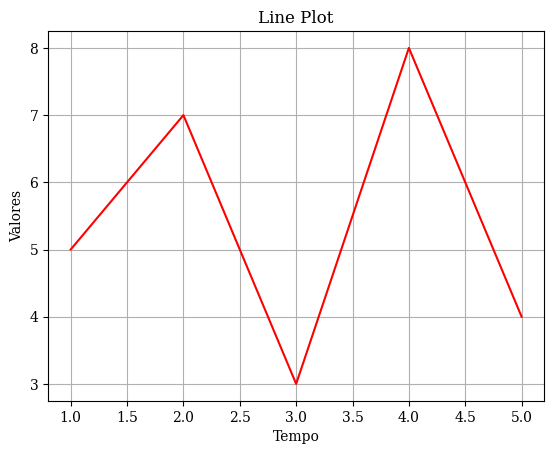

In [284]:
x = [1, 2, 3, 4, 5]
y = [5, 7, 3, 8, 4]
generate_line_plot(
    x, y, 
    xlabel='Tempo', 
    ylabel='Valores', 
    title='Line Plot', 
    grid=True,
    color='red'
)

## Gráficos de Dispersão

In [285]:
def generate_scatter_plot(data_x, data_y, xlabel='X', ylabel='Y', title='Scatter Plot', grid=False, color='blue'):
    """
    Gera um gráfico de dispersão (scatter plot) a partir dos dados fornecidos.

    Parâmetros:
    - data_x (list): Uma lista contendo os valores do eixo x.
    - data_y (list): Uma lista contendo os valores do eixo y, correspondentes aos valores de x.
    - xlabel (str, opcional): Rótulo do eixo x.
    - ylabel (str, opcional): Rótulo do eixo y.
    - title (str, opcional): Título do gráfico.
    - grid (bool, opcional): Se True, ativa a exibição da grade no gráfico. Padrão é False.
    - color (str, opcional): Cor dos pontos do gráfico. Deve ser uma string válida de cor suportada pelo Matplotlib.
                            Padrão é 'b' (azul).
    """
    if not isinstance(data_x, list) or not isinstance(data_y, list):
        raise ValueError("Both data_x and data_y must be lists.")
    
    if not isinstance(grid, bool):
        raise ValueError("grid must be a boolean value (True or False).")
    
    if not isinstance(color, str):
        raise ValueError("color must be a string.")
    
    # Check if the provided color is valid
    if not mcolors.is_color_like(color):
        raise ValueError("Invalid color. Please provide a valid color name or HTML color representation.")
    
    plt.scatter(data_x, data_y, zorder=2, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if grid:
        plt.grid(True)
    else:
        plt.grid(False)
    plt.show()

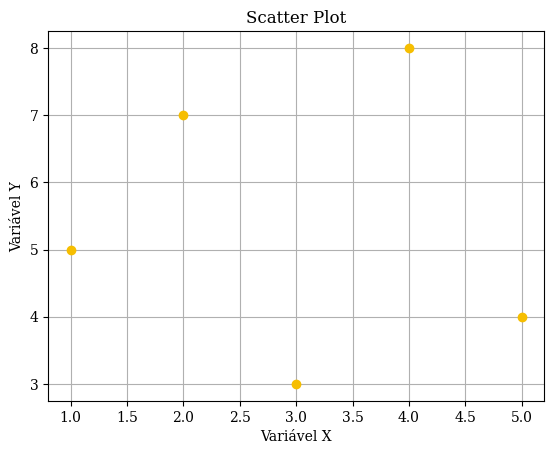

In [286]:
x = [1, 2, 3, 4, 5]
y = [5, 7, 3, 8, 4]
generate_scatter_plot(
    x, y, 
    xlabel='Variável X', 
    ylabel='Variável Y', 
    title='Scatter Plot',
    grid=True,
    color='#F6BE00'
)

## Gráficos de Mapa

In [287]:
def plot_geo_data(url):
    """
    Plota dados geográficos a partir da URL fornecida.

    Parâmetros:
    url (str): A URL do arquivo de dados geográficos. Pode ser um caminho local ou um URL remoto.

    Exemplo de uso:
    plot_geo_data("https://example.com/dados_geograficos.geojson")

    Nota:
    Certifique-se de ter as bibliotecas fsspec e geopandas instaladas.
    Você pode instalá-las usando o gerenciador de pacotes pip:

    pip install fsspec geopandas
    """
    with fsspec.open(f"simplecache::{url}") as file:
        gdf = gpd.read_file(file)
    
    gdf.plot()
    plt.show()

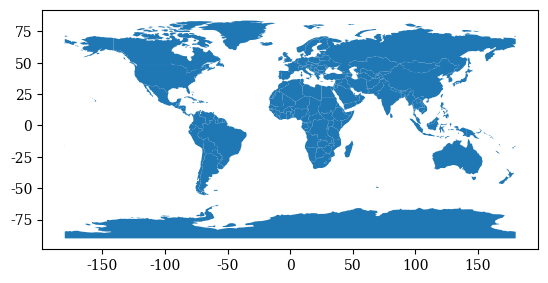

In [288]:
url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/" \
      "download/110m/cultural/ne_110m_admin_0_countries.zip"

plot_geo_data(url)

## Gráfico de pizza

In [289]:
def generate_pie_chart(data_values, data_labels=None, labels=None, colors=None, title='Pie Chart'):
    """
    Gera um gráfico de pizza (pie chart) a partir dos dados fornecidos.

    Parâmetros:
    - data_values (list): 
        Uma lista contendo os valores dos setores do gráfico.
    - data_labels (list, opcional): 
        Uma lista de rótulos para cada valor do gráfico.
        Se não fornecida, os valores de data_values serão usados como rótulos.
    - labels (list, opcional): 
        Rótulos personalizados para cada setor do gráfico.
        Se não fornecida, data_labels será usada.
    - colors (list, opcional): 
        Uma lista de cores personalizadas para cada setor do gráfico.
        Se não fornecida, as cores padrão serão usadas.
    - title (str, opcional): 
        Título do gráfico.
    """

    if not isinstance(data_values, list):
        raise ValueError("data_values must be a list.")
    
    if labels is None:
        labels = data_labels
    if colors is None:
        colors = plt.cm.tab20c(np.arange(len(data_values)))
        
    plt.pie(data_values, labels=labels, colors=colors)
    plt.title(title)
    plt.show()

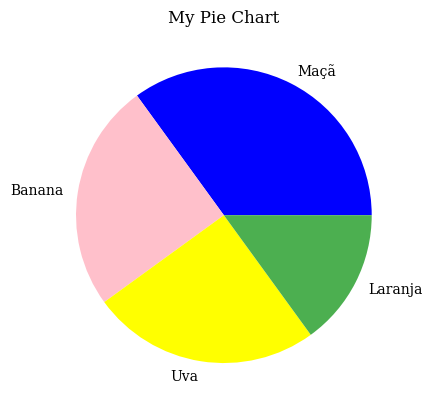

In [290]:
y = [35, 25, 25, 15]
mylabels = ["Maçã", "Banana", "Uva", "Laranja"]
mycolors = ["blue", "pink", "yellow", "#4CAF50"]
generate_pie_chart(y, data_labels=mylabels, colors=mycolors, title='My Pie Chart')

## Funções

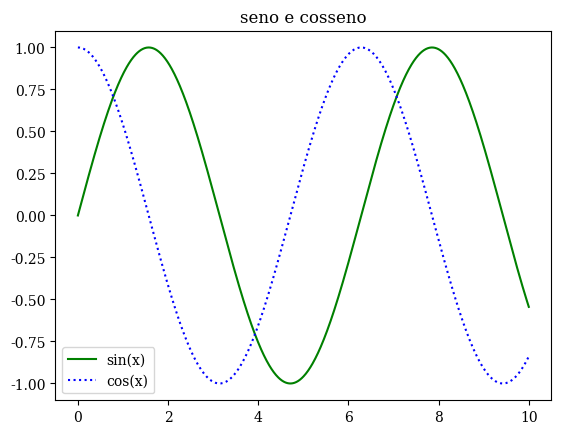

In [291]:
x = np.linspace(0, 10, 1000)
plt.plot(x,np.sin(x),'g', label='sin(x)')
plt.plot(x,np.cos(x), ':b', label='cos(x)')
plt.title('seno e cosseno')
plt.legend()
plt.show()

## Diagrama de caixa (Boxplot)

Por meio dele é possível fazer uma relação entre uma variável quantitativa (numérica) e outra qualitativa (categórica). 
O objetivo da construção desse gráfico é tornar mais nítida a visualização das estatísticas para fazer análises e/ou processamentos em relação a dispersão, assimetria, média, outliers (mínimos e máximos) e mediana, que podem auxiliar em atividades de data science por exemplo. Em um gráfico do tipo boxplot é exibido o resumo dos 5 números, que são: mínimo, primeiro quartil, mediana (ou segundo quartil), terceiro quartil e o máximo.

- **Mínimo** – É o valor mínimo do conjunto de dados, mas que respeita um certo limite. É possível a existência de valores discrepantes que são ainda menores (outliers).
- **Primeiro Quartil (Q1)** – É a base da caixa retângular. Uma demarcação que distingue que 25% dos dados estão abaixo e os outros 75% dos dados estão acima desse valor.
- **Mediana ou Segundo Quartil (Q2)** – A linha mais ao centro do gráfico, demarcar o valor central do conjunto de dados. 50% dos dados são maiores que esse valor e os outros 50% dos dados são menores.
- **Terceiro Quartil (Q3)** – O topo da caixa retangular. Essa linha informa o número que fica entre os 75% valores mais baixos e os 25% valores mais altos.
- **Máximo** – Valor máximo do conjunto de dados, mas respeitando um limite calculado. É possível a existência de valores acima deste na base de dados (outliers).
- **Outliers** – Valores discrepantes que estão fora de um intervalo definido, altos demais ou baixos demais.

<img src="https://lh6.googleusercontent.com/wAhTkaCAIktFW4OXNYwckEIn0l7zMEr3PZKdti3EZFdpNRttpUerczr8xPTUUmqsEh04ZJXMMoW3Lca2eEYPozwRpO6jhSwQ7912HVgcmQ6LweKqgs4lm3nLnwB-35FSm61PdCmN=s0" width="50%" height="50%" />

In [292]:
def calcular_valores_boxplot(dados):
    """
    Calcula os cinco valores necessários para construir um boxplot a partir dos dados fornecidos.

    Parâmetros:
        dados (list): Uma lista de valores para o cálculo dos valores do boxplot.

    Retorna:
        Um dicionário contendo os cinco valores calculados: mínimo, primeiro quartil, mediana (segundo quartil),
        terceiro quartil e máximo.
    """
    # Ordenar os dados em ordem crescente
    dados_ordenados = sorted(dados)

    # Calcular a mediana (segundo quartil)
    n = len(dados_ordenados)
    mediana = dados_ordenados[n // 2] if n % 2 != 0 else (dados_ordenados[n // 2 - 1] + dados_ordenados[n // 2]) / 2

    # Calcular o primeiro quartil (Q1) e terceiro quartil (Q3)
    q1_index = n // 4
    q3_index = n * 3 // 4
    primeiro_quartil = dados_ordenados[q1_index] if n % 4 != 0 else (dados_ordenados[q1_index - 1] + dados_ordenados[q1_index]) / 2
    terceiro_quartil = dados_ordenados[q3_index] if n % 4 != 0 else (dados_ordenados[q3_index - 1] + dados_ordenados[q3_index]) / 2

    # Calcular o mínimo e o máximo
    minimo = dados_ordenados[0]
    maximo = dados_ordenados[-1]

    # Retornar os valores calculados em um dicionário
    valores_boxplot = {
        'minimo': minimo,
        'primeiro_quartil': primeiro_quartil,
        'mediana': mediana,
        'terceiro_quartil': terceiro_quartil,
        'maximo': maximo
    }

    return valores_boxplot

In [293]:
# Dados de exemplo para teste da função
dados_exemplo = [22, 22, 24, 25, 26, 27, 28, 30, 31, 46]

# Chamando a função para calcular os valores do boxplot
valores_boxplot = calcular_valores_boxplot(dados_exemplo)

# Imprimindo os valores calculados
print(valores_boxplot)

{'minimo': 22, 'primeiro_quartil': 24, 'mediana': 26.5, 'terceiro_quartil': 30, 'maximo': 46}


In [294]:
def gerar_boxplot(dados, rotulos):
    """
    Gera um gráfico de boxplot com os dados fornecidos e rótulos para cada conjunto de dados.

    Parâmetros:
        dados (list): Uma lista de listas contendo os dados para cada grupo a ser plotado.
        rotulos (list): Uma lista de strings contendo os rótulos para cada conjunto de dados.
    """
    plt.boxplot(dados)

    # Definir rótulos para cada conjunto de dados
    plt.xticks(range(1, len(rotulos) + 1), rotulos)

    # Adicionar título e rótulo dos eixos
    plt.title('Boxplot dos Dados')
    plt.ylabel('Valores')

    # Mostrar o gráfico
    plt.show()

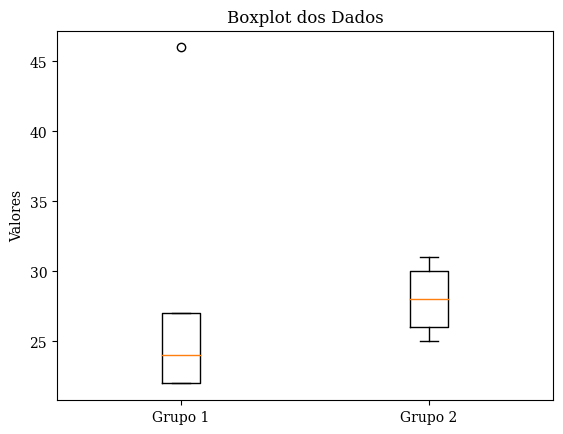

In [295]:
# Dados e rótulos para o exemplo
dados_exemplo = [
    [22, 24, 22, 27, 46],
    [30, 28, 26, 25, 31]
]

rotulos_exemplo = ['Grupo 1', 'Grupo 2']

# Chamando a função para gerar o boxplot com os dados e rótulos fornecidos
gerar_boxplot(dados_exemplo, rotulos_exemplo)

## Gráfico de bolhas

In [351]:
import matplotlib.pyplot as plt

def plot_scatter_with_size_and_color(x, y, z, colors, labels, alpha=0.4, marker_size=4000, marker="o", grid=False):
    """
    Generate a scatter plot with size, color, marker, and grid customization.

    Parameters:
        x (array-like): X-coordinates of the data points.
        y (array-like): Y-coordinates of the data points.
        z (array-like): Size values of the data points.
        colors (list): List of colors for each data point.
        labels (list): List of labels (player names) for each data point.
        alpha (float, optional): Transparency of the data points. Default is 0.4.
        marker_size (float, optional): Scaling factor for the marker size. Default is 4000.
        marker (str, optional): Marker shape. Default is 'o' (circle).
        grid (bool, optional): Whether to show grid lines. Default is False (no grid).

    Returns:
        None (displays the plot using plt.show())
    """
    # Check if the input arrays have the same length
    if len(x) != len(y) or len(x) != len(z) or len(y) != len(z):
        raise ValueError("Input arrays x, y, and z must have the same length.")

    # Create the scatter plot with individual colors and labels
    for i in range(len(x)):
        plt.scatter(x[i], y[i], s=z[i] * marker_size, c=colors[i], alpha=alpha, marker=marker, label=labels[i], zorder=2)

    # Set integer ticks on the x and y axes
    plt.xticks(range(int(min(x)), int(max(x)) + 1))
    plt.yticks(range(int(min(y)), int(max(y)) + 1))

    # Show grid if enabled
    if grid:
        plt.grid()

    # Add legend with small squares (marker='s')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale=0.5)

    # Show the plot
    plt.show()

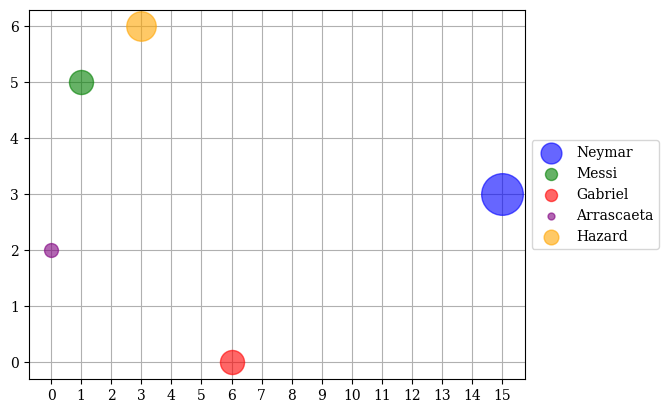

In [352]:
# Dados fictícios de alguns jogadores (nome, gols, assistência)
jogadores = ['Neymar', 'Messi', 'Gabriel', 'Arrascaeta', 'Hazard']
# eixo x
gols = [15, 1, 6, 0, 3]
# eixo y
assistencias = [3, 5, 0, 2, 6]
cores = ['blue', 'green', 'red', 'purple', 'orange']

# Calcular a participação (soma de gols e assistências) de cada jogador
participacao = [g + a for g, a in zip(gols, assistencias)]

# Chamando a função para plotar o gráfico de bolhas com gols no eixo x e assistências no eixo y
plot_scatter_with_size_and_color(
    gols, 
    assistencias, 
    participacao, 
    colors=cores, 
    labels=jogadores, 
    alpha=0.6, 
    marker_size=50, 
    marker="o", 
    grid=True
)

## Mapa de calor

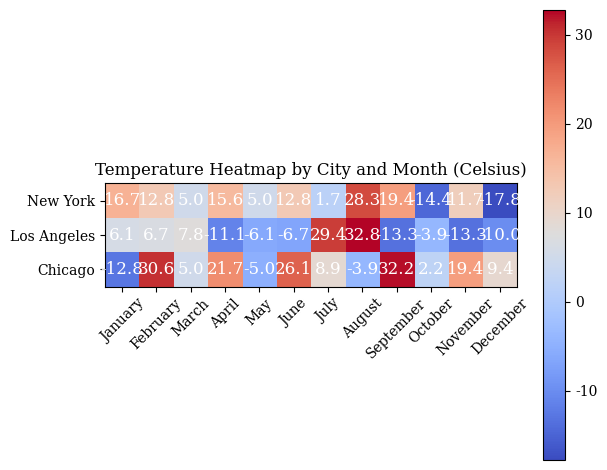

In [299]:
# Cities and months
cities = [
    'New York', 'Los Angeles', 'Chicago'
]
months = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Generate random temperature data for each city for 12 months (in Fahrenheit)
data_fahrenheit = np.random.randint(low=0, high=100, size=(len(cities), len(months)))

# Convert the temperature data from Fahrenheit to Celsius
data_celsius = (data_fahrenheit - 32) * 5 / 9

# Create a figure and an axis
fig, ax = plt.subplots()

# Create the heatmap
heatmap = ax.imshow(data_celsius, cmap='coolwarm')

# Add a colorbar to the right of the heatmap
cbar = plt.colorbar(heatmap)

# Set the title and axis labels
ax.set_title('Temperature Heatmap by City and Month (Celsius)')
ax.set_xticks(np.arange(len(months)))
ax.set_yticks(np.arange(len(cities)))
ax.set_xticklabels(months)
ax.set_yticklabels(cities)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add text annotations to each cell showing the temperature value in Celsius
for i in range(len(cities)):
    for j in range(len(months)):
        ax.text(j, i, f'{data_celsius[i, j]:.1f}', ha='center', va='center', color='white', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## Gráfico de rosca

In [300]:
def criar_grafico_rosca(dados, rotulos, titulo, cores=None):
    """
    Cria um gráfico de rosca com base nos dados e rótulos fornecidos.

    Parâmetros:
        dados (list): Uma lista contendo os valores numéricos para cada categoria.
        rotulos (list): Uma lista contendo os rótulos (nomes) para cada categoria.
        titulo (str): O título do gráfico.
        cores (list, opcional): Uma lista contendo as cores para cada setor do gráfico. Se não for fornecido,
                                serão utilizadas cores padrão.

    Retorna:
        None (exibe o gráfico)
    """

    # Crie uma figura e um eixo
    fig, ax = plt.subplots()

    # Se não foram fornecidas cores, utilize cores padrão
    if cores is None:
        cores = plt.cm.Set3.colors[:len(dados)]

    # Crie o gráfico de rosca com melhor posicionamento dos rótulos e percentuais externos
    wedges, _, text = ax.pie(dados, labels=rotulos, colors=cores, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

    # Defina a fonte e tamanho dos rótulos
    for t in text:
        t.set_fontsize(12)

    # Adicione um círculo no meio para criar o "furo"
    centro_circle = plt.Circle((0, 0), 0.6, fc='white')
    fig.gca().add_artist(centro_circle)

    # Crie uma legenda com as cores e rótulos das categorias
    ax.legend(wedges, rotulos, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Ajuste o aspecto para ser uma circunferência
    ax.axis('equal')

    # Defina o título do gráfico
    plt.title(titulo)

    # Exiba o gráfico
    plt.show()


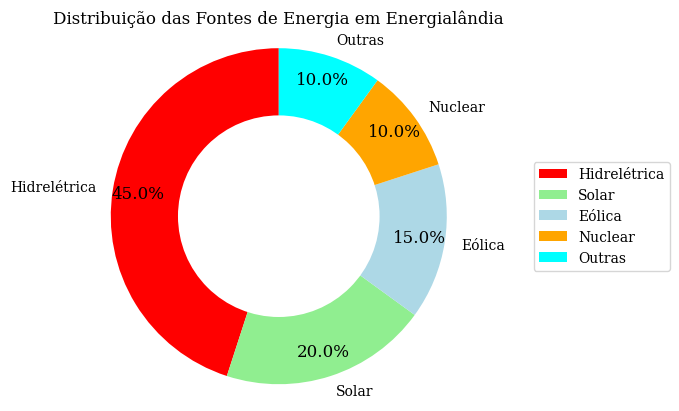

In [302]:
# Exemplo de uso da função:

cores_personalizadas = ['red', 'lightgreen', 'lightblue', 'orange', 'cyan']

categorias = ['Hidrelétrica', 'Solar', 'Eólica', 'Nuclear', 'Outras']
valores = [45, 20, 15, 10, 10]
titulo_grafico = 'Distribuição das Fontes de Energia em Energialândia'

criar_grafico_rosca(
    valores, 
    categorias, 
    titulo_grafico,
    cores=cores_personalizadas
)

## Gráfico da distribuição normal

A mais importante distribuição de probabilidade contínua em todo o domínio da estatística é a distribuição normal

Seu gráfico, chamado de curva normal, é a curva em forma de sino (Fig. 1) que aproximadamente descreve muitos fenômenos que ocorrem na natureza, indústria e pesquisa.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQYOy0U0cTYugvANTRmov4OxbUSaeNN2mC_e3z2Q0rnQkf7BqeQFdw77HIVeWz4Q9_Afy0&usqp=CAU" />

Em 1733, Abraham De Moivre desenvolveu a equação matemática da curva normal. Ele forneceu uma base a partir da 
qual grande parte da teoria de estatísticas indutivas é fundamentada.

A distribuição normal é muitas vezes referida como a distribuição de Gauss, em homenagem a Karl Friedrich Gauss que também derivou sua equação.

A equação matemática para a distribuição de probabilidade da variável normal depende de dois parâmetros, μ e σ, a sua média e desvio padrão, respectivamente.

<img src="https://images.prismic.io/voitto-blog/MmVhNzEzZTktMDA2MS00ZWY4LWIzZGEtMzgxMGMyOGVhMzc4_zvfp6phhpg3bbrxhfkil05eldhq4i6lg89ltr8isqtulwupntzgdwfhbfybqm6fpxlanmwxiydw_5evilwm9acrkq57zlsu55ig9ikwpgdxij4tlbenbkitws2lbzzddpwbshjpp" />

Na Figura a seguir, há duas curvas normais com o mesmo desvio padrão, mas diferentes meios. As duas curvas são idênticas na forma, mas são centradas em diferentes posições ao longo do eixo horizontal

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQVVB9ERIxN_tUeOrjINiLbT0Q_nL_uCDr6KuE5iNPTD0nMqPSsXG_dOob1QPaZyuB-JE0&usqp=CAU" />

<center>Curvas Normal com μ1 < μ2 e σ1 = σ2</center>

Na Figura a seguir, há duas curvas normais com a mesma média, mas diferentes desvios-padrão. A curva com o maior desvio padrão é menor e se espalha mais.

<img src="https://i2.wp.com/linkconcursos.com.br/wp-content/uploads/2013/03/curvanormalmediasiguaisdesviopadraodiferentes.jpg" />

<center>Curvas Normal com μ1 = μ2 e σ1 < σ2</center>

A Figura a seguir mostra duas curvas normais com diferentes meios e desvios padrão diferentes. Claramente, estão centrados em diferentes posições no eixo horizontal e as suas formas refletem os dois valores diferentes de σ.

### pontos de inflexão

Pontos de inflexão são pontos onde o gráfico de uma função muda de concavidade (de ∪ para ∩ ou vice-versa).
Ou seja, representa o ponto onde a curvatura da função muda para cima e para baixo.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT0xBqwIkJu9jHgBI92Shk6B0AtvQpAe8umdpDN3Ytx3Ppirf6XDM_F8EHRwNkTK_6shQ&usqp=CAU" />

## Propriedades da Curva Normal

- O ponto sobre o eixo horizontal, onde a curva tem um valor máximo, ocorre em x = μ.
- A curva é simétrica em torno de um eixo vertical que passa pelo meio μ.
- A curva tem seus pontos de inflexão em x = μ ± σ; é côncava para baixo se μ-σ <X <μ + σ e é côncava para cima de outra forma
- A curva normal se aproxima do eixo horizontal assintoticamente como derivamos em qualquer direção que se afasta a partir da média.
- A área total sob a curva e acima do eixo horizontal é igual a 1.


## REFERÊNCIAS

https://python-graph-gallery.com/